In [781]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn import svm


In [782]:
df = pd.read_csv("loan_train.csv")

In [783]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [784]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [785]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

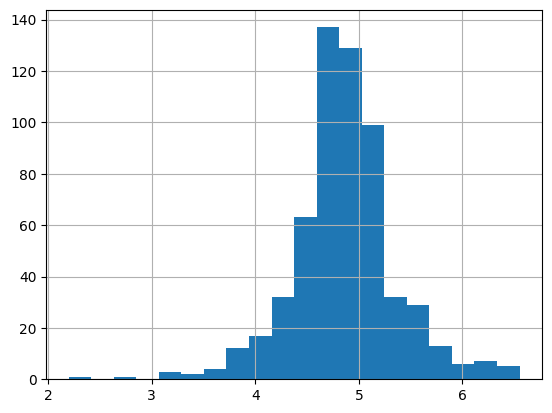

In [786]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])
df['LoanAmount_log'].hist(bins=20)

In [787]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

<Axes: >

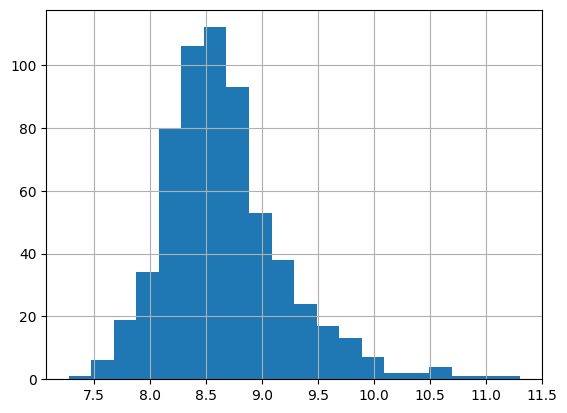

In [788]:
df['TotalAmount'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalAmount_log'] = np.log(df['TotalAmount'])
df['TotalAmount_log'].hist(bins=20)

In [789]:
for col in ['Gender','Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mode()[0])

for col in ['LoanAmount', 'LoanAmount_log']:
    if not df[col].mode().empty:
        df[col] = df[col].fillna(df[col].mean())


In [790]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
TotalAmount          0
TotalAmount_log      0
dtype: int64

In [791]:
x = df.iloc[:, np.r_[1:5,9:11,13:15]].values
y = df.iloc[:, 12].values

x

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      shape=(614, 8), dtype=object)

In [792]:
y


array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

Gender of the prople who are taking loan: 
Gender
Male      502
Female    112
Name: count, dtype: int64


C:\Users\withp\AppData\Local\Temp\ipykernel_9784\4269320881.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Gender', data=df, palette='Set1')


<Axes: xlabel='Gender', ylabel='count'>

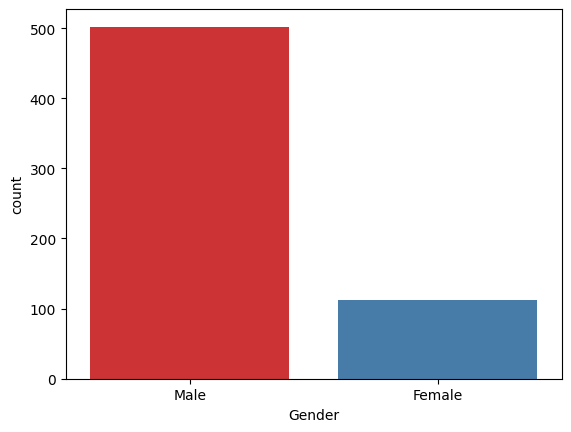

In [793]:
print("Gender of the prople who are taking loan: ")
print(df['Gender'].value_counts())
sn.countplot(x='Gender', data=df, palette='Set1')

People who takes loan is married or not: 
Married
Yes    401
No     213
Name: count, dtype: int64


C:\Users\withp\AppData\Local\Temp\ipykernel_9784\35105711.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Married', data=df, palette='Set1')


<Axes: xlabel='Married', ylabel='count'>

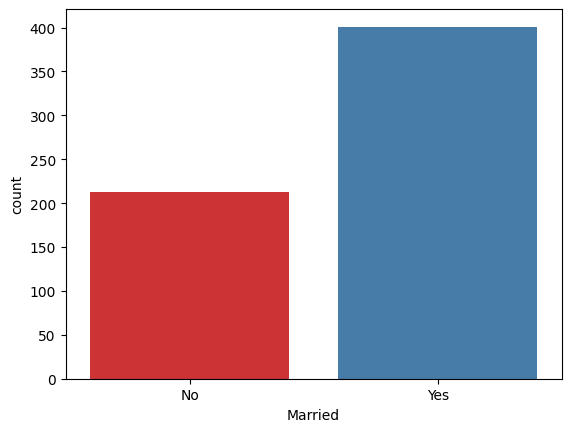

In [794]:
print("People who takes loan is married or not: ")
print(df['Married'].value_counts())
sn.countplot(x='Married', data=df, palette='Set1')

People who takes loan as dependents: 
Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


C:\Users\withp\AppData\Local\Temp\ipykernel_9784\2570948394.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Dependents', data=df, palette='Set1')


<Axes: xlabel='Dependents', ylabel='count'>

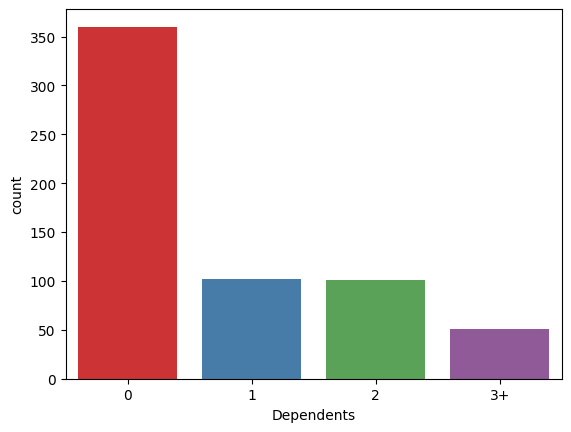

In [795]:
print("People who takes loan as dependents: ")
print(df['Dependents'].value_counts())
sn.countplot(x='Dependents', data=df, palette='Set1')

People who takes loan are selfemployed or not: 
Self_Employed
No     532
Yes     82
Name: count, dtype: int64


C:\Users\withp\AppData\Local\Temp\ipykernel_9784\2892509825.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.countplot(x='Self_Employed', data=df, palette='Set1')


<Axes: xlabel='Self_Employed', ylabel='count'>

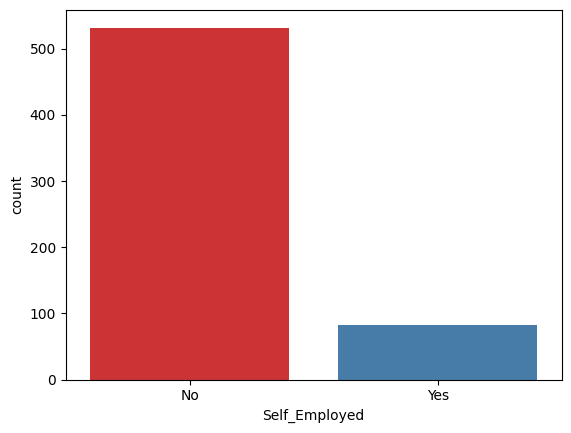

In [796]:
print("People who takes loan are selfemployed or not: ")
print(df['Self_Employed'].value_counts())
sn.countplot(x='Self_Employed', data=df, palette='Set1')

In [797]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)

from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [798]:
for i in range(0,5):
    X_train[:,i] = LabelEncoder_x.fit_transform(X_train[:,i])
    X_train[:,7] = LabelEncoder_x.fit_transform(X_train[:,7])

X_train

array([[1, 1, 1, ..., 1.0, 3.784189633918261, 235],
       [1, 0, 0, ..., 1.0, 4.836281906951478, 155],
       [1, 0, 2, ..., 1.0, 5.087596335232384, 372],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 343],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 258],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 285]],
      shape=(460, 8), dtype=object)

In [799]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)
y_train

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,

In [800]:
for i in range(0,5):
    X_test[:,i] = LabelEncoder_x.fit_transform(X_test[:,i])
    X_test[:,7] = LabelEncoder_x.fit_transform(X_test[:,7])

X_test

array([[1, 0, 0, ..., 1.0, 4.430816798843313, 105],
       [0, 0, 0, ..., 1.0, 4.718498871295094, 38],
       [1, 1, 0, ..., 1.0, 5.780743515792329, 127],
       ...,
       [1, 1, 0, ..., 1.0, 4.912654885736052, 132],
       [1, 0, 0, ..., 1.0, 4.882801922586371, 83],
       [1, 1, 1, ..., 0.0, 4.795790545596741, 44]],
      shape=(154, 8), dtype=object)

In [801]:
LabelEncoder_y = LabelEncoder()
y_test = LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [802]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)


In [803]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)


RandomForestClassifier()

In [804]:
y_pred = rf_clf.predict(X_test)

print("Accuracy of Randomforest is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of Randomforest is: 0.8116883116883117


array([0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [805]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

# Update model to best one
model = grid.best_estimator_
y_pred = model.predict(X_test)


Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.7826086956521738


In [806]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
print("Test Accuracy of best RandomForest:", accuracy_score(y_test, y_pred))


Test Accuracy of best RandomForest: 0.8181818181818182


In [807]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 20  23]
 [  5 106]]
              precision    recall  f1-score   support

           0       0.80      0.47      0.59        43
           1       0.82      0.95      0.88       111

    accuracy                           0.82       154
   macro avg       0.81      0.71      0.74       154
weighted avg       0.82      0.82      0.80       154



In [808]:
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [809]:
y_pred = nb_clf.predict(X_test)

print("Accuracy of GaussianNB is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of GaussianNB is: 0.8311688311688312


array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0])

In [810]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 19  24]
 [  2 109]]
              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



In [811]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [812]:
y_pred = dt_clf.predict(X_test)

print("Accuracy of Decision tree is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of Decision tree is: 0.6818181818181818


array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0])

In [813]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[24 19]
 [30 81]]
              precision    recall  f1-score   support

           0       0.44      0.56      0.49        43
           1       0.81      0.73      0.77       111

    accuracy                           0.68       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.71      0.68      0.69       154



In [814]:
from sklearn.neighbors import KNeighborsClassifier

kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [815]:
y_pred = kn_clf.predict(X_test)

print("Accuracy of KNN is:", metrics.accuracy_score(y_pred, y_test))
y_pred

Accuracy of KNN is: 0.8116883116883117


array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0])

In [816]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 21  22]
 [  7 104]]
              precision    recall  f1-score   support

           0       0.75      0.49      0.59        43
           1       0.83      0.94      0.88       111

    accuracy                           0.81       154
   macro avg       0.79      0.71      0.73       154
weighted avg       0.80      0.81      0.80       154



In [817]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save model
import pickle
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)
